# Imports

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets #Retirar após o uso do dataset do Hackday
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Global variables

In [2]:
rawData = pd.DataFrame()
outliersData = pd.DataFrame()

# Functions

In [18]:
def loadData(x: str):
    """Função para carregar arquivo csv com a base de dados"""
    global rawData
    if not os.path.exists(x):
        print("Arquivo não encontrado.")
        return None
    rawData = pd.DataFrame(pd.read_csv(x))
    print(f"Sample do dataframe:\n{rawData.sample(5)}")
    return

def checkData():
    print(f"Descrição dos dados:\n{rawData.describe()}\n")
    print(f"Número de nulos por coluna:\n{rawData.isnull().sum()}\n")
    print(f"Tipos das colunas:\n{rawData.dtypes}\n")
    return

def checkCorrelation():
    plt.figure(figsize=(10,8))
    sns.heatmap(rawData.corr(), annot=True)
    plt.show()
    return

def checkOutliers():
    global outliersData
    outliers_df = pd.DataFrame()
    # Itera sobre as colunas númericas
    for column in rawData.select_dtypes(include=[np.number]).columns:
        # Calcula o 1 quartil (Q1)
        Q1 = rawData[column].quantile(0.25)
        # Calcula o 3 quartil (Q3)
        Q3 = rawData[column].quantile(0.75)
        # Calcula o Intervalo Interquartil (IQR)
        IQR = Q3 - Q1
        # Define os limites inferior e superior para outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Identica os outliers da coluna atual e adiciona ao DataFrame de outliers
        outliers = rawData[(rawData[column] < lower_bound) | (rawData[column] > upper_bound)]
        # Concatene os outliers da coluna atual ao DataFrame de outliers
        outliers_df = pd.concat([outliers_df, outliers])
    outliersData = outliers_df.drop_duplicates().reset_index(drop=True)
    print(f"Sample de outliers:\n{outliersData.sample(5)}")
    return


# Loading data

In [14]:
loadData("data.csv")

Sample do dataframe:
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
12734  7.8031      18.0  7.153509   1.000000       599.0  2.627193     38.58   
12618  4.2075      15.0  6.111334   1.054162      2415.0  2.422267     38.50   
11786  5.5205      14.0  7.225532   1.034043      1974.0  2.800000     38.80   
2246   3.4167      23.0  5.433915   1.021197      1852.0  2.309227     36.82   
6792   3.3988      48.0  4.697586   1.036849      2446.0  3.108005     34.08   

       Longitude  
12734    -121.34  
12618    -121.54  
11786    -121.25  
2246     -119.79  
6792     -118.15  


# Descrição

In [15]:
checkData()

Descrição dos dados:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.4297

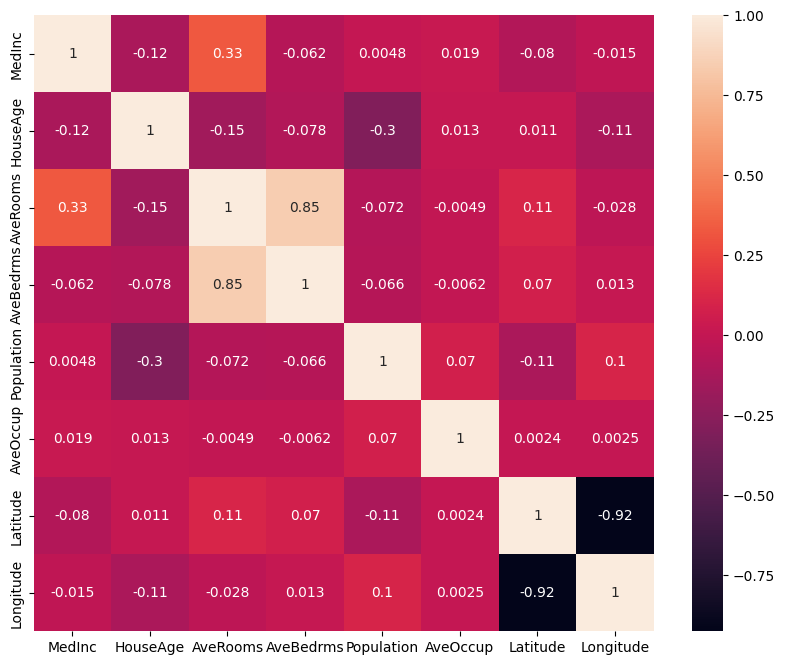

In [16]:
checkCorrelation()

In [19]:
checkOutliers()

Sample de outliers:
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
3155   7.5000      14.0  7.402810   1.062451      4108.0  3.206870     37.13   
463    8.6030      52.0  7.673469   1.061224       518.0  2.642857     32.75   
1216   1.6607      16.0  6.710526   1.921053        85.0  2.236842     39.71   
213   15.0001      48.0  8.845161   1.058065       528.0  3.406452     34.19   
312   11.5706      36.0  7.682131   1.061856      1315.0  2.259450     37.87   

      Longitude  
3155    -121.60  
463     -117.18  
1216    -122.74  
213     -118.18  
312     -122.47  


# Feature Enginnering

# Filtragem de variáveis

# Ánalise exploratoria (EDA)

# Preparação dos dados

# Seleção de variáveis

# Treinamento e avaliação de modelos

## Regressão linear

In [ ]:
# Verificando o nome das colunas
column_names = rawData.columns.tolist()
print(column_names)

In [ ]:

X = rawData[column_names[0:-2]]
y = rawData[column_names[6:8]]
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
predictions.shape

## 2.7 - Fine Tuning

## 2.8 - Deploy

# Conclusões